# Chapter 4

## The Core Python Language II


## Operating-System Services


In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import math

# %matplotlib inline



In [2]:
n = sys.argv[0]
n


'C:\\Compilers\\Anaconda3\\envs\\py310\\lib\\site-packages\\ipykernel_launcher.py'

In [3]:
print(os.getenv("HOME"))



None


In [4]:
os.path.basename("/home/brian/test.py")



'test.py'

In [5]:
os.path.dirname("/home/brian/test.py")



'/home/brian'

In [6]:
os.path.split("/home/brian/test.py")



('/home/brian', 'test.py')

In [7]:
dir_name = os.path.dirname(sys.argv[0])
for filename in os.listdir(dir_name):
    oldpath = os.path.join(dir_name, filename)
    print(oldpath)


C:\Compilers\Anaconda3\envs\py310\lib\site-packages\adodbapi
C:\Compilers\Anaconda3\envs\py310\lib\site-packages\anyio
C:\Compilers\Anaconda3\envs\py310\lib\site-packages\anyio-3.4.0.dist-info
C:\Compilers\Anaconda3\envs\py310\lib\site-packages\argon2
C:\Compilers\Anaconda3\envs\py310\lib\site-packages\argon2_cffi-21.1.0.dist-info
C:\Compilers\Anaconda3\envs\py310\lib\site-packages\async_generator
C:\Compilers\Anaconda3\envs\py310\lib\site-packages\async_generator-1.10.dist-info
C:\Compilers\Anaconda3\envs\py310\lib\site-packages\attr
C:\Compilers\Anaconda3\envs\py310\lib\site-packages\attrs-21.2.0.dist-info
C:\Compilers\Anaconda3\envs\py310\lib\site-packages\babel
C:\Compilers\Anaconda3\envs\py310\lib\site-packages\Babel-2.9.1.dist-info
C:\Compilers\Anaconda3\envs\py310\lib\site-packages\backcall
C:\Compilers\Anaconda3\envs\py310\lib\site-packages\backcall-0.2.0.dist-info
C:\Compilers\Anaconda3\envs\py310\lib\site-packages\backports
C:\Compilers\Anaconda3\envs\py310\lib\site-packages\

In [8]:
sys.argv[0]


'C:\\Compilers\\Anaconda3\\envs\\py310\\lib\\site-packages\\ipykernel_launcher.py'

In [9]:
def _powerset(s):
    """ A generator yielding the power set of the items in the sequence s. """
    if len(s) <= 1:
        yield s  # The singleton set
        yield ()  # The empty set
    else:
        # Loop over the elements in the power set formed from all the items
        # after the first in s and yield them with and without this first one.
        for item in _powerset(s[1:]):
            yield (s[0],) + item
            yield item


def powerset(s):
    """ A generator returning all the subsets of the set s. """
    return set((frozenset(_s) for _s in _powerset(tuple(s))))


S = {"a", "b", "c"}
P = powerset(S)

print(P)
# An alternative, nicer way to print the powerset: sorted by cardinality of
# subsets and then by subset elements (assuming they can be ordered)
print(tuple(sorted((tuple(sorted(s)) for s in P), key=lambda s: (len(s), s))))


{frozenset({'a'}), frozenset({'b', 'a'}), frozenset({'c', 'a'}), frozenset({'c', 'b'}), frozenset({'c'}), frozenset({'b'}), frozenset({'c', 'b', 'a'}), frozenset()}
((), ('a',), ('b',), ('c',), ('a', 'b'), ('a', 'c'), ('b', 'c'), ('a', 'b', 'c'))


### P4.4.2


In [10]:
dir_name = "C:/Users/Cenk/OneDrive/Documents/CourseMaterial/Python/SciPythonBook/test"

try:
    os.mkdir(dir_name)
except:
    print("OK")

os.chdir(dir_name)
for i in range(5):
    file_name = f"fig{i:02d}.svg"
    with open(file_name, "w") as f:
        print(
            """<?xml version="1.0" encoding="utf-8"?>
                    <svg xmlns="http://www.w3.org/2000/svg"
                        xmlns:xlink="http://www.w3.org/1999/xlink"
                        width="500" height="500" style="background: #ffffff">""",
            file=f,
        )
        print(
            f"""<circle cx="{(i+1)*250}"" cy="250.0" r="200" style="stroke: black; stroke -width: 2px; fill: none;" >""",
            file=f,
        )
        print("""<circle cx="430.0" cy="250.0" r="20" style="stroke: red; fill: red;"/>""", file=f)
        print("</svg>", file=f)
        f.close()

os.chdir("../")
print(os.getcwd())


OK
C:\Users\Cenk\OneDrive\Documents\CourseMaterial\Python\SciPythonBook


## Modules


In [11]:
import random


In [12]:
print(random.random())  # uniform random btw 0-1
print(random.uniform(2, 4))  # uniform random btw x-y
print(random.randint(3, 8))  # uniform random int btw x-y
print(random.choice([1, 2, 3, 4]))  # random selection from list
print(random.choices([1, 2, 3, 4], k=3))  # random selections from list with replacement
print(random.sample([3, 5, 6, 7], 3))  # random selections from list without replacement
print(random.normalvariate(3.4, 1))  # normal distribution mu and sigma



0.5668547461611922
3.9518107735028885
6
3
[1, 2, 4]
[6, 5, 7]
3.6158025859375593


In [13]:
sq = [3, 6, "w", "f"]
random.shuffle(sq)  # inplace
sq


['f', 6, 3, 'w']

### E4.17


In [14]:
def run_trail():

    door_list = [1, 2, 3]
    prize_door = random.randint(1, 3)
    choose_door = random.randint(1, 3)
    door_list.remove(choose_door)

    if prize_door in door_list:
        door_list.remove(prize_door)

    open_door = random.choice(door_list)

    return choose_door, prize_door, open_door


def run_exp(n):
    nochange = 0
    change = 0
    for i in range(n):
        choose_door, prize_door, open_door = run_trail()
        if choose_door == prize_door:
            nochange += 1
        else:
            change += 1

    return nochange / n, change / n


a, b = run_exp(100)
print(f"With switching = {a*100:.2f}%,      Without switching = {b*100:.2f}%")



With switching = 35.00%,      Without switching = 65.00%


In [15]:
def run_trial(switch_doors, ndoors=3):
    """
    Run a single trial of the Monty Hall problem , with or without switching
    after the game show host reveals a goat behind one of the unchosen doors.
    (switch_doors is True or False). The car is behind door number 1 and the
    game show host knows that. Returns True for a win, otherwise returns False.
    """
    # Pick a random door out of the ndoors available.
    chosen_door = random.randint(1, ndoors)
    if switch_doors:
        # Reveal a goat.
        revealed_door = 3 if chosen_door == 2 else 2
        # Make the switch by choosing any other door than the initially
        # selected one and the one just opened to reveal a goat.
        available_doors = [
            dnum for dnum in range(1, ndoors + 1) if dnum not in (chosen_door, revealed_door)
        ]
        chosen_door = random.choice(available_doors)
    # You win if you picked door number 1.
    return chosen_door == 1


def run_trials(ntrials, switch_doors, ndoors=3):
    """
    Run ntrials iterations of the Monty Hall problem with ndoors doors, with
    and without switching (switch_doors = True or False). Returns the number
    of trials which resulted in winning the car by picking door number 1.
    """
    nwins = 0
    for i in range(ntrials):
        if run_trial(switch_doors, ndoors):
            nwins += 1
    return nwins


ndoors, ntrials = 3, 100
nwins_without_switch = run_trials(ntrials, False, ndoors)
nwins_with_switch = run_trials(ntrials, True, ndoors)
print("Monty Hall Problem with {} doors".format(ndoors))
print("Proportion of wins without switching: {:.4f}".format(nwins_without_switch / ntrials))
print("Proportion of wins with switching: {:.4f}".format(nwins_with_switch / ntrials))



Monty Hall Problem with 3 doors
Proportion of wins without switching: 0.3100
Proportion of wins with switching: 0.6800


In [16]:
import urllib.request

req = urllib.request.Request("https://www.wikipedia.org")
response = urllib.request.urlopen(req)
content = response.read()
# charset = response.headers.get_param("meta charset")
html = content.decode("utf-8")


In [17]:
url = "https://wikipedia.org/w/api.php"
data = {"page": "Monty_Python", "prop": "text", "action": "parse", "section": 0}
encoded_data = urllib.parse.urlencode(data)
full_url = url + "?" + encoded_data
full_url


'https://wikipedia.org/w/api.php?page=Monty_Python&prop=text&action=parse&section=0'

In [18]:
req = urllib.request.Request(full_url)
response = urllib.request.urlopen(req)
html = response.read().decode("utf-8")
# html;



In [19]:
from datetime import datetime, date, time

today = date.today()
today


datetime.date(2021, 12, 2)

In [20]:
today.ctime()


'Thu Dec  2 00:00:00 2021'

In [21]:
now = datetime.now()
now.ctime()


'Thu Dec  2 16:43:21 2021'

In [22]:
"""
%a Abbreviated weekday (Sun, Mon, etc.)
%A Full weekday (Sunday, Monday, etc.)
%w Weekday number (0 = Sunday, 1 = Monday, . . . , 6 = Saturday)
%d Zero-padded day of month: 01, 02, 03, . . . , 31
%b Abbreviated month name (Jan, Feb, etc.)
%B Full month name (January, February, etc.)
%m Zero-padded month number: 01, 02, . . . , 12
%y Year without century (two-digit, zero-padded): 01, 02, . . . , 99
%Y Year with century (four-digit, zero-padded): 0001, 0002, . . . 9999
%H 24-hour clock hour, zero-padded: 00, 01, . . . , 23
%I 12-hour clock hour, zero-padded: 00, 01, . . . , 12
%p AM or PM (or locale equivalent)
%M Minutes (two-digit, zero-padded): 00, 01, . . . , 59
%S Seconds (two-digit, zero-padded): 00, 01, . . . , 59
%f Microseconds (six-digit, zero-padded): 000000, 000001, . . . , 999999
%% The literal % sign
"""


'\n%a Abbreviated weekday (Sun, Mon, etc.)\n%A Full weekday (Sunday, Monday, etc.)\n%w Weekday number (0 = Sunday, 1 = Monday, . . . , 6 = Saturday)\n%d Zero-padded day of month: 01, 02, 03, . . . , 31\n%b Abbreviated month name (Jan, Feb, etc.)\n%B Full month name (January, February, etc.)\n%m Zero-padded month number: 01, 02, . . . , 12\n%y Year without century (two-digit, zero-padded): 01, 02, . . . , 99\n%Y Year with century (four-digit, zero-padded): 0001, 0002, . . . 9999\n%H 24-hour clock hour, zero-padded: 00, 01, . . . , 23\n%I 12-hour clock hour, zero-padded: 00, 01, . . . , 12\n%p AM or PM (or locale equivalent)\n%M Minutes (two-digit, zero-padded): 00, 01, . . . , 59\n%S Seconds (two-digit, zero-padded): 00, 01, . . . , 59\n%f Microseconds (six-digit, zero-padded): 000000, 000001, . . . , 999999\n%% The literal % sign\n'

In [23]:
now.strftime("%I:%M:%S on %d/%m/%y")



'04:43:21 on 02/12/21'

In [24]:
launch_time = datetime.strptime("09:32:00 July 16, 1969", "%H:%M:%S %B %d, %Y")
print(launch_time)


1969-07-16 09:32:00


## An Introduction to Object-Oriented Programming

In [25]:
"""

class SubClass(BaseClass1, BaseClass2, ...):
............

def __ init __(self, customer , account_number , interest_rate , balance=0):
    "Initialize the savings account. "
    super().__ init __(customer , account_number , balance)

"""


'\n\nclass SubClass(BaseClass1, BaseClass2, ...):\n............\n\ndef __ init __(self, customer , account_number , interest_rate , balance=0):\n    "Initialize the savings account. "\n    super().__ init __(customer , account_number , balance)\n\n'

In [48]:
random.seed(42)


class Polymer:
    """A class representing polymers"""

    def __init__(self, N, a):
        self.N = N
        self.a = a
        self.R = None
        self.segments = []
        self.make_polymer()

    def make_polymer(self):
        self.segments.append((0, 0, 0))
        x, y, z = cx, cy, cz = 0, 0, 0
        for i in range(1, self.N):
            theta = math.acos(2 * random.random() - 1)
            phi = random.random() * 2.0 * math.pi
            # Add on the corresponding displacement vector for this segment.
            x += self.a * math.sin(theta) * math.cos(phi)
            y += self.a * math.sin(theta) * math.sin(phi)
            z += self.a * math.cos(theta)
            self.segments.append((x, y, z))
            cx, cy, cz = cx + x, cy + y, cz + z
        cx, cy, cz = cx / self.N, cy / self.N, cz / self.N
        self.R = x, y, z
        for i in range(self.N):
            self.segments[i] = (
                self.segments[i][0] - cx,
                self.segments[i][1] - cy,
                self.segments[i][2] - cz,
            )

    def save_svg(self, svg_name="polymer.svg"):
        canvas_width = 500
        canvas_height = 500
        fo = open(svg_name, "w")
        print(
            """<?xml version="1.0" encoding="utf-8"?>
                 <svg xmlns="http://www.w3.org/2000/svg"
                      xmlns:xlink="http://www.w3.org/1999/xlink"
                      width="{}" height="{}" style="background: {}">""".format(
                canvas_width, canvas_height, "#ffffff"
            ),
            file=fo,
        )

        ccx, ccy = canvas_width / 2, canvas_height / 2
        scale = 10

        x, y, z = zip(*self.segments)
        xmin, xmax, ymin, ymax = min(x), max(x), min(y), max(y)
        dmax = max(xmax - xmin, ymax - ymin)
        scale = min(canvas_width, canvas_height) / dmax
        for i in range(1, self.N):
            x1, y1 = x[i - 1] * scale + ccx, y[i - 1] * scale + ccy
            x2, y2 = x[i] * scale + ccx, y[i] * scale + ccy
            print(
                '<line x1="{:.1f}" y1="{:.1f}" x2="{:.1f}" y2="{:.1f}"'
                ' style="stroke: {:s}; stroke-width: {:d};"/>'.format(x1, y1, x2, y2, "red", 2),
                file=fo,
            )
        print("</svg>", file=fo)

    def calc_Rg(self):
        """
        Calculates and returns the radius of gyration , Rg. The polymer
        segment positions are already given relative to the center of
        mass, so this is just the rms position of the segments.
        """
        self.Rg = 0.0
        for x, y, z in self.segments:
            self.Rg += x ** 2 + y ** 2 + z ** 2
            self.Rg = math.sqrt(self.Rg / self.N)
            return self.Rg


In [49]:
ply = Polymer(1000, 0.5)
ply.save_svg()
print(ply.R)
print(ply.calc_Rg())


(-4.482203726152313, -6.328955462076854, 6.7023274080546615)
0.14103346446304693


1000 / 3000
2000 / 3000
3000 / 3000


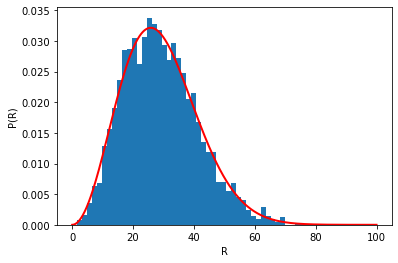

In [28]:
pi = math.pi
# Calculate R for Np polymers.
Np = 3000
# Each polymer consists of N segments of length a.
N, a = 1000, 1.0
R = [None] * Np
for i in range(Np):
    polymer = Polymer(N, a)
    Rx, Ry, Rz = polymer.R
    R[i] = math.sqrt(Rx ** 2 + Ry ** 2 + Rz ** 2)
    # Output a progress indicator every 100 polymers.
    if not (i + 1) % 1000:
        print(i + 1, "/", Np)
# Plot the distribution of Rx as a normalized histogram
# using 50 bins.
plt.hist(R, 50, stacked=True, density=True)
# Plot the theoretical probability distribution , Pr, as a function of r.
r = np.linspace(0, 100, 1000)
msr = N * a ** 2
Pr = 4.0 * pi * r ** 2 * (2 * pi * msr / 3) ** -1.5 * np.exp(-3 * r ** 2 / 2 / msr)
plt.plot(r, Pr, lw=2, c="r")
plt.xlabel("R")
plt.ylabel("P(R)")
plt.show()


In [29]:
class Vector2D:
    """A two-dimensional vector with Cartesian coordinates."""

    def __init__(self, x, y):
        self.x, self.y = x, y

    def __str__(self):
        """Human-readable string representation of the vector."""
        return "{:g}i + {:g}j".format(self.x, self.y)

    def __repr__(self):
        """Unambiguous string representation of the vector."""
        return repr((self.x, self.y))

    def dot(self, other):
        """The scalar (dot) product of self and other. Both must be vectors."""

        if not isinstance(other, Vector2D):
            raise TypeError("Can only take dot product of two Vector2D objects")
        return self.x * other.x + self.y * other.y

    # Alias the __matmul__ method to dot so we can use a @ b as well as a.dot(b).
    __matmul__ = dot

    def __sub__(self, other):
        """Vector subtraction."""
        return Vector2D(self.x - other.x, self.y - other.y)

    def __add__(self, other):
        """Vector addition."""
        return Vector2D(self.x + other.x, self.y + other.y)

    def __mul__(self, scalar):
        """Multiplication of a vector by a scalar."""

        if isinstance(scalar, int) or isinstance(scalar, float):
            return Vector2D(self.x * scalar, self.y * scalar)
        raise NotImplementedError("Can only multiply Vector2D by a scalar")

    def __rmul__(self, scalar):
        """Reflected multiplication so vector * scalar also works."""
        return self.__mul__(scalar)

    def __neg__(self):
        """Negation of the vector (invert through origin.)"""
        return Vector2D(-self.x, -self.y)

    def __truediv__(self, scalar):
        """True division of the vector by a scalar."""
        return Vector2D(self.x / scalar, self.y / scalar)

    def __mod__(self, scalar):
        """One way to implement modulus operation: for each component."""
        return Vector2D(self.x % scalar, self.y % scalar)

    def __abs__(self):
        """Absolute value (magnitude) of the vector."""
        return math.sqrt(self.x ** 2 + self.y ** 2)

    def distance_to(self, other):
        """The distance between vectors self and other."""
        return abs(self - other)

    def to_polar(self):
        """Return the vector's components in polar coordinates."""
        return self.__abs__(), math.atan2(self.y, self.x)


if __name__ == "__main__":
    v1 = Vector2D(2, 5 / 3)
    v2 = Vector2D(3, -1.5)
    print("v1 = ", v1)
    print("repr(v2) = ", repr(v2))
    print("v1 + v2 = ", v1 + v2)
    print("v1 - v2 = ", v1 - v2)
    print("abs(v2 - v1) = ", abs(v2 - v1))
    print("-v2 = ", -v2)
    print("v1 * 3 = ", v1 * 3)
    print("7 * v2 = ", 7 * v1)
    print("v2 / 2.5 = ", v2 / 2.5)
    print("v1 % 1 = ", v1 % 1)
    print("v1.dot(v2) = v1 @ v2 = ", v1 @ v2)
    print("v1.distance_to(v2) = ", v1.distance_to(v2))
    print("v1 as polar vector, (r, theta) =", v1.to_polar())



v1 =  2i + 1.66667j
repr(v2) =  (3, -1.5)
v1 + v2 =  5i + 0.166667j
v1 - v2 =  -1i + 3.16667j
abs(v2 - v1) =  3.3208098075285464
-v2 =  -3i + 1.5j
v1 * 3 =  6i + 5j
7 * v2 =  14i + 11.6667j
v2 / 2.5 =  1.2i + -0.6j
v1 % 1 =  0i + 0.666667j
v1.dot(v2) = v1 @ v2 =  3.5
v1.distance_to(v2) =  3.3208098075285464
v1 as polar vector, (r, theta) = (2.6034165586355518, 0.6947382761967033)


### P4.6.1

In [30]:
class BankAccount:
    """ An abstract base class representing a bank account."""

    currency = "$"

    def __init__(self, customer, account_number, balance=0):
        """
        Initialize the BankAccount class with a customer , account number
        and opening balance (which defaults to 0.)
        """

        self.customer = customer
        self.set_account_number(account_number)
        self.balance = balance

    def set_account_number(self, account_number):
        ccl = []
        for n in str(account_number):
            if n == " ":
                continue
            ccl.append(int(n))
        for i in range(0, 16, 2):
            ccl[i] *= 2
            if ccl[i] > 9:
                ccl[i] = 1 + (ccl[i] - 10)
        checksum = sum(ccl) % 10
        if checksum:
            print(account_number, "is not a valid credit card number")
            return None
        else:
            print(account_number, "is a valid credit card number")
            self.account_number = account_number

    def deposit(self, amount):
        """ Deposit amount into the bank account."""
        if amount > 0:
            self.balance += amount
        else:
            print("Invalid deposit amount:", amount)

    def withdraw(self, amount):
        """
        Withdraw amount from the bank account , ensuring there are sufficient
        funds.
        """
        if amount > 0:
            if amount > self.balance:
                print("Insufficient funds")
            else:
                self.balance -= amount
        else:
            print("Invalid withdrawal amount:", amount)

    def check_balance(self):
        """ Print a statement of the account balance. """
        print(
            "The balance of account number {:d} is {:s}{:.2f}".format(
                self.account_number, self.currency, self.balance
            )
        )


class Customer:
    """ A class representing a bank customer. """

    def __init__(self, name, address, date_of_birth):
        self.name = name
        self.address = address
        self.date_of_birth = datetime.strptime(date_of_birth, "%Y-%m-%d")
        self.password = "1234"

    def get_age(self):
        """ Calculates and returns the customer ' s age. """
        today = datetime.today()
        try:
            birthday = self.date_of_birth.replace(year=today.year)
        except ValueError:
            # birthday is 29 Feb but today ' s year is not a leap year
            birthday = self.date_of_birth.replace(year=today.year, day=self.date_of_birth.day - 1)
        if birthday > today:
            return today.year - self.date_of_birth.year - 1
        return today.year - self.date_of_birth.year


class SavingsAccount(BankAccount):
    """ A class representing a savings account. """

    def __init__(self, customer, account_number, interest_rate, balance=0):
        """ Initialize the savings account. """
        self.interest_rate = interest_rate
        super().__init__(customer, account_number, balance)

    def add_interest(self):
        """ Add interest to the account at the rate self.interest_rate. """
        self.balance *= 1.0 + self.interest_rate / 100


class CurrentAccount(BankAccount):
    """ A class representing a current (checking) account. """

    def __init__(self, customer, account_number, annual_fee, transaction_limit, balance=0):
        """ Initialize the current account. """

        self.over_draft = transaction_limit
        self.annual_fee = annual_fee
        self.transaction_limit = transaction_limit
        super().__init__(customer, account_number, balance)

    def withdraw(self, amount):
        """
        Withdraw amount if sufficient funds exist in the account and amount
        is less than the single transaction limit.
        """
        if amount <= 0:
            print("Invalid withdrawal amount:", amount)
            return
        if amount > self.balance + self.over_draft:
            print("Insufficient funds")
            return
        if amount > self.transaction_limit:
            print(
                "{0:s}{1:.2f} exceeds the single transaction limit of"
                " {0:s}{2:.2f}".format(self.currency, amount, self.transaction_limit)
            )
            return
        self.balance -= amount
        if self.balance < 0:
            self.over_draft = 0

    def apply_annual_fee(self):
        """ Deduct the annual fee from the account balance. """
        self.balance = max(0.0, self.balance - self.annual_fee)


In [31]:
my_account = BankAccount('Joe Bloggs', 4556737586899855)
# print(my_account.account_number)
my_account.deposit(64)
my_account.balance

4556737586899855 is a valid credit card number


64

In [32]:
from datetime import datetime
customer1 = Customer('Helen Smith', '76 The Warren , Blandings , Sussex', '1976-02-29')
account1 = BankAccount(customer1 , 4556737586899855, 1000)
account1.customer.get_age()
print(account1.customer.address)

4556737586899855 is a valid credit card number
76 The Warren , Blandings , Sussex


In [33]:
my_savings = SavingsAccount('Matthew Walsh', 4556737586899855, 5.5, 1000)
my_savings.check_balance()
my_savings.add_interest()
my_savings.check_balance()
my_current = CurrentAccount("Alison Wicks", 4556737586899855, 20., 200.)
# print(my_current.over_draft)
my_current.check_balance()
my_current.withdraw(200)
my_current.check_balance()
my_current.withdraw(20)
my_current.check_balance()
my_current.deposit(750)
my_current.check_balance()
my_current.withdraw(220)

4556737586899855 is a valid credit card number
The balance of account number 4556737586899855 is $1000.00
The balance of account number 4556737586899855 is $1055.00
4556737586899855 is a valid credit card number
The balance of account number 4556737586899855 is $0.00
The balance of account number 4556737586899855 is $-200.00
Insufficient funds
The balance of account number 4556737586899855 is $-200.00
The balance of account number 4556737586899855 is $550.00
$220.00 exceeds the single transaction limit of $200.00


### P4.6.5

In [34]:
class OneBasedList(list):
    """A class implementing a list with one-based indexing."""

    def _resolve_index(self, i):
        """A helper function to resolve one-based list indexes to native ones."""
        if i is None:
            return None
        if i == 0:
            raise IndexError('No zero index for OneBasedList')
        if i < 0:
            return i
        return i - 1

    def _resolve_slice(self, sl):
        """A helper function to resolve one-based list slices to native ones."""
        istart = self._resolve_index(sl.start)
        istop = sl.stop
        if sl.step and sl.step < 0:
            istop = self._resolve_index(sl.stop)
        return slice(istart, istop, sl.step)


    def _resolve_slice_or_index(self, x):
        """
        A helper function to resolve one-based list indexes or slices into
        native, zero-based ones.

        """

        if type(x) is slice:
            return self._resolve_slice(x)
        return self._resolve_index(x)


    def __setitem__(self, i, e):
        """Item setting, either with either a one-based index or slice."""
        return super().__setitem__(self._resolve_slice_or_index(i), e)

    def __getitem__(self, i):
        """Item getting, either with either a one-based index or slice."""
        if type(i) == slice:
            # Take care to return another OneBasedList object.
            return type(self)(super().__getitem__(self._resolve_slice(i)))
        return super().__getitem__(self._resolve_index(i))


    def __delitem__(self, i):
        """Delete item at (one-based) index or slice i."""
        return super().__delitem__(self._resolve_slice_or_index(i))

    def pop(self, i=None):
        """Pop an item from the end of the OneBasedList or at index i."""
        if i is None:
            return super().pop()
        return super().pop(i-1)

    def index(self, e, istart=None, istop=None):
        """
        Obtain the index of element e, possibly constrained to within the
        (one-based) index range istart to istop.

        """

        sl = self._resolve_slice(slice(istart, istop, 1))
        _istart = sl.start
        _istop = sl.stop
        if _istop is None:
            if _istart is None:
                return super().index(e) + 1
            return super().index(e, _istart) + 1
        return super().index(e, _istart, _istop) + 1

    def copy(self):
        """Copy the OneBasedList, returning a new instance of this class."""
        return type(self)(self)

    def insert(self, i, e):
        """Insert e at (one-based) index i."""
        _i = self._resolve_index(i)
        super().insert(_i, e)

    def __add__(self, other):
        """OneBasedList concatenation, returning another OneBasedList.

        Note that adding a list to a OneBasedList returns a OneBasedList;
        adding a OneBasedList to a list returns a list.

        """
        return type(self)(super().__add__(other))

    def __mul__(self, n):
        """OneBasedList concatenation by repetition n times."""
        return type(self)(super().__mul__(n))

    def __rmul__(self, n):
        """OneBasedList concatenation by repetition n times."""
        return type(self)(super().__rmul__(n))

In [ ]:
"""   1          BD+44 4550      3 36042          46           000001.1+444022000509.9+451345114.44-16.88 6.70  +0.07 +0.08         A1Vn               -0.012-0.018      -018      195  4.2  21.6AC   3"""

In [52]:
import sys
import math

# try:
#     constellation = sys.argv[1]
# except IndexError:
#     print('usage:\n'
#           'python {:s} <constellation>\n'
#           'where <constellation> is the three-letter abbreviation for a'
#           ' constellation name (e.g. Ori, Lyr, UMa, ...)'.format(sys.argv[0]))
#     sys.exit(1)

constellation = "Ori"


class Star:
    """
    A class representing a star, with name, magnitude, right ascension (ra),
    declination (dec) and projected co-ordinates x,y calculated by a class
    method.

    """

    def __init__(self, name, mag, ra, dec):
        """
        Initializes the star object with its name and magnitude, and position
        as right ascension (ra) and declination (dec), both in radians.

        """

        self.name = name
        self.mag = mag
        self.ra = ra
        self.dec = dec

    def project_orthographic(self, ra0, dec0):
        """
        Calculates, stores and returns the projected co-ordinates (x, y) of
        this star's position using an orthographic projection about the
        angular position (ra0, dec0).

        """

        delta_ra = self.ra - ra0
        self.x = math.cos(self.dec) * math.sin(delta_ra)
        self.y = math.sin(self.dec) * math.cos(dec0) - math.cos(self.dec) * math.cos(
            delta_ra
        ) * math.sin(dec0)
        return self.x, self.y


stars = []
with open("bsc5.dat", "r") as fi:
    for line in fi.readlines():
        if line[11:14] != constellation:
            # We have no interest of stars which do not belong to constellation
            continue
        name = line[4:14]
        try:
            mag = float(line[102:107])
        except ValueError:
            # some stars do not have magnitudes: ignore these entries
            continue
        # Right ascension (hrs, mins, secs), equinox J2000, epoch 2000.0
        ra_hrs, ra_min, ra_sec = [float(x) for x in (line[75:77], line[77:79], line[79:83])]
        # Declination (hrs, mins, secs), equinox J2000, epoch 2000.0
        dec_deg, dec_min, dec_sec = [float(x) for x in (line[83:86], line[86:88], line[88:90])]
        # Convert both RA and declination to radians
        ra = math.radians((ra_hrs + ra_min / 60 + ra_sec / 3600) * 15.0)
        dec = math.radians(dec_deg + dec_min / 60 + dec_sec / 3600)
        # Create a new Star object and add it to the list of stars
        stars.append(Star(name, mag, ra, dec))

n = len(stars)
if n == 0:
    print("Constellation {:s} not found.".format(constellation))
    sys.exit(1)
else:
    print("Found {:d} stars in the constellation {:s}".format(n, constellation))

# Now calculate the projected co-ordinates of each star, (x,y), finding the
# maximum and minimum values and hence the aspect ratio for our image.
# The "centre" of the constellation in RA, dec:
ra0 = sum([star.ra for star in stars]) / n
dec0 = sum([star.dec for star in stars]) / n
x, y = [None] * n, [None] * n
for i, star in enumerate(stars):
    # Orthographic projection (ra, dec) -> (x1, y1)
    x[i], y[i] = star.project_orthographic(ra0, dec0)
xmin, xmax, ymin, ymax = min(x), max(x), min(y), max(y)
aspect_ratio = (xmax - xmin) / (ymax - ymin)

# The stars will be output on a canvas of dimensions width x height, with
# some extra padding around the outside of the "paintable" area.
padding = 50
height = 500
width = int(height * aspect_ratio)

# Write the SVG image file for the constellation
with open("{:s}.svg".format(constellation), "w") as f:
    print('<?xml version="1.0" encoding="utf-8"?>', file=f)
    print('<svg xmlns="http://www.w3.org/2000/svg"', file=f)
    print('     xmlns:xlink="http://www.w3.org/1999/xlink"', file=f)
    print(
        '     width="{:d}" height="{:d}" style="background: #000000">'.format(
            width + 2 * padding, height + 2 * padding
        ),
        file=f,
    )
    for star in stars:
        rx = (star.x - xmin) / (xmax - xmin)
        ry = (star.y - ymin) / (ymax - ymin)
        cx = padding + (1 - rx) * (width - 2 * padding)
        cy = padding + (1 - ry) * (height - 2 * padding)
        print(
            '<circle cx="{cx:.1f}" cy="{cy:.1f}" r="{r:.1f}"'
            ' stroke="none" fill="#ffffff" name="{name:s}"/>'.format(
                cx=cx, cy=cy, r=max(1, 5 - star.mag), name=star.name
            ),
            file=f,
        )
    print("</svg>", file=f)



Found 78 stars in the constellation Ori
